**Import Library**

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

**Define Callbacks for Terminating the Program after Reaching a Certain Values**

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')>0.6):
      print('\n Reaching 60% accuracy so cancelling training !')
      self.model.stop_training = True

In [0]:
callbacks=myCallback()

**Import Datasets**

In [0]:
fashion_mnist=keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


**Normalizing the Data**

In [0]:
train_images=train_images/255.0

In [0]:
test_images=test_images/255.0

**Model Definition**

In [0]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(units=512,activation=tf.nn.relu),
                        keras.layers.Dense(units=10,activation=tf.nn.softmax)                        
                        ])

**Plotting Label Data**

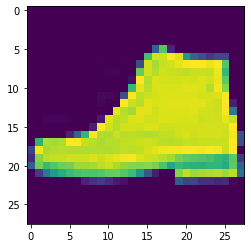

In [9]:
plt.imshow(train_images[42])

**Compile the Model**

In [0]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Fit the Model**

In [11]:
model.fit(train_images, train_labels, epochs=20, callbacks=[callbacks])

Epoch 1/20
1864/1875 [============================>.] - ETA: 0s - loss: 0.4729 - accuracy: 0.8302
 Reaching 60% accuracy so cancelling training !
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4724 - accuracy: 0.8304


**Evaluate the Model**

In [12]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3929 - accuracy: 0.8600


[0.392857164144516, 0.8600000143051147]